<a href="https://colab.research.google.com/github/YeonKang/Python-for-Machine-Learning/blob/main/Lec3_8_Kaggle_with_bike_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset**


*   datetime : hourly date + timestamp
*   season : 1 = spring, 2 = summer, 3 = fall, 4 = winter
*   holiday : whether the day is considered a holiday
*   workingday : whether the day is neither a weekend nor holiday
*   weather
  *   1: Clear, Few clouds, Partly cloudy, Partly cloudy
  *   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  *   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  *   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*   temp : temperature in Celsius
*   atemp : "feels like" temperature in Celsius
*   humidity : relative humidity
*   windspeed : wind speed
*   casual : number of non-registered user rentals initiated
*   registered : number of registered user rentals initiated
*   count : number of total rentals



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Data**

In [13]:
from google.colab import files
myfile = files.upload()

Saving test.csv to test (3).csv
Saving train.csv to train (2).csv


In [14]:
import io

test_df = pd.read_csv(io.BytesIO(myfile['test.csv']), parse_dates=["datetime"])
train_df = pd.read_csv(io.BytesIO(myfile['train.csv']), parse_dates=["datetime"])

In [15]:
all_df = pd.concat((train_df, test_df), axis=0).reset_index() #handle duplicate index values through reset index
all_df.head()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [16]:
all_df.tail()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17374,6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17377,6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN
17378,6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,NaN,NaN


In [17]:
train_index = list(range(len(train_df)))
test_index = list(range(len(train_df),len(all_df)))

In [18]:
all_df.isnull().sum()

index            0
datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count         6493
dtype: int64

**Evaluation metrics**

<center>$\sqrt{\frac{1}{n}\Sigma^n_{i=1}(log(p_i+1)-log(a_i+1))^2}$</center>

*   n is the number of hours in the test set
*   pi is your predicted count
*   ai is the actual count
*   log(x) is the natural logarithm



In [19]:
x = np.array([np.inf, -np.inf, np.nan, -128, 128])
np.nan_to_num(x)

array([ 1.79769313e+308, -1.79769313e+308,  0.00000000e+000,
       -1.28000000e+002,  1.28000000e+002])

In [20]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.log(y + 1))
    log2 = np.nan_to_num(np.log(y_ + 1))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [21]:
myfile2 = files.upload()

Saving sampleSubmission.csv to sampleSubmission.csv


In [25]:
submission_df = pd.read_csv(io.BytesIO(myfile2['sampleSubmission.csv']), parse_dates=["datetime"])
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [26]:
rmsle(submission_df["count"].values, 
      np.random.randint(0, 100, size=len(submission_df)))

3.7475366100187366

In [27]:
del all_df["casual"]
del all_df["registered"]
del all_df["index"]

In [28]:
pre_df = all_df.merge(pd.get_dummies(all_df["season"], prefix="season"), left_index=True, right_index=True)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,1,0,0,0


In [29]:
pre_df = pre_df.merge(pd.get_dummies(all_df["weather"], prefix="weather"), left_index=True, right_index=True)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,1,0,0,0,1,0,0,0


In [30]:
pre_df["datetime"].unique()

array(['2011-01-01T00:00:00.000000000', '2011-01-01T01:00:00.000000000',
       '2011-01-01T02:00:00.000000000', ...,
       '2012-12-31T21:00:00.000000000', '2012-12-31T22:00:00.000000000',
       '2012-12-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [31]:
pre_df["year"] = pre_df["datetime"].dt.year
pre_df["month"] = pre_df["datetime"].dt.month
pre_df["day"] = pre_df["datetime"].dt.day
pre_df["hour"] = pre_df["datetime"].dt.hour
pre_df["weekday"] = pre_df["datetime"].dt.weekday

In [32]:
pre_df= pre_df.merge(pd.get_dummies(pre_df["weekday"], prefix="weekday"), left_index=True, right_index=True)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year,month,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,1,0,0,0,1,0,0,0,2011,1,1,0,5,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,1,0,0,0,1,0,0,0,2011,1,1,1,5,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,1,0,0,0,1,0,0,0,2011,1,1,2,5,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,1,0,0,0,1,0,0,0,2011,1,1,3,5,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,1,0,0,0,1,0,0,0,2011,1,1,4,5,0,0,0,0,0,1,0


In [33]:
pre_df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
season_1               uint8
season_2               uint8
season_3               uint8
season_4               uint8
weather_1              uint8
weather_2              uint8
weather_3              uint8
weather_4              uint8
year                   int64
month                  int64
day                    int64
hour                   int64
weekday                int64
weekday_0              uint8
weekday_1              uint8
weekday_2              uint8
weekday_3              uint8
weekday_4              uint8
weekday_5              uint8
weekday_6              uint8
dtype: object

In [34]:
category_variable_list = ["season","weather","workingday","season_1","season_2","season_3","season_4","weather_1","weather_2","weather_3","weather_4","year","month","day","hour","weekday","weekday_0","weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6"]
for var_name in category_variable_list:
    pre_df[var_name] = pre_df[var_name].astype("category")

In [35]:
pre_df.dtypes

datetime      datetime64[ns]
season              category
holiday                int64
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
season_1            category
season_2            category
season_3            category
season_4            category
weather_1           category
weather_2           category
weather_3           category
weather_4           category
year                category
month               category
day                 category
hour                category
weekday             category
weekday_0           category
weekday_1           category
weekday_2           category
weekday_3           category
weekday_4           category
weekday_5           category
weekday_6           category
dtype: object

In [36]:
train_df = pre_df.iloc[train_index]

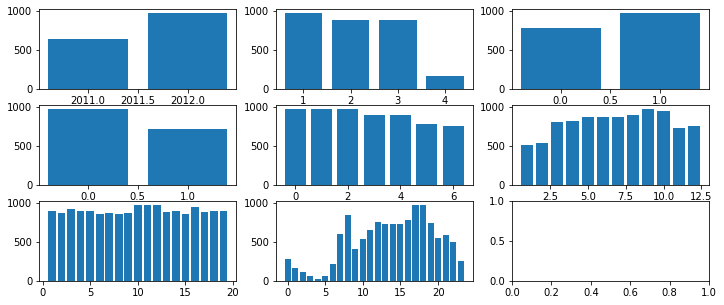

In [37]:
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(12, 5)
axes[0][0].bar(train_df["year"], train_df["count"])
axes[0][1].bar(train_df["weather"], train_df["count"])
axes[0][2].bar(train_df["workingday"], train_df["count"])
axes[1][0].bar(train_df["holiday"], train_df["count"])
axes[1][1].bar(train_df["weekday"], train_df["count"])
axes[1][2].bar(train_df["month"], train_df["count"])
axes[2][0].bar(train_df["day"], train_df["count"])
axes[2][1].bar(train_df["hour"], train_df["count"])
plt.show()

In [38]:
serires_data = train_df.groupby(["month"])["count"].mean()

In [39]:
serires_data.index.tolist()[:5]

[1, 2, 3, 4, 5]

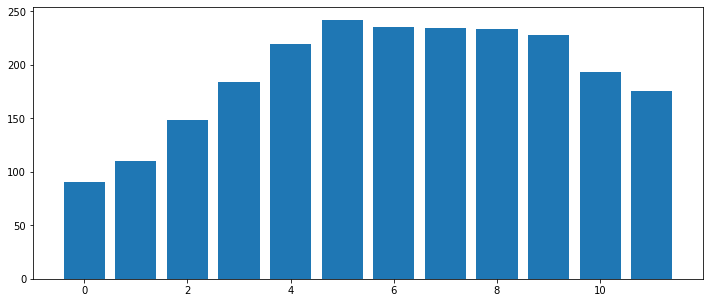

In [40]:
fig, ax = plt.subplots()
ax.bar(range(len(serires_data)), serires_data)
fig.set_size_inches(12,5)
plt.show()

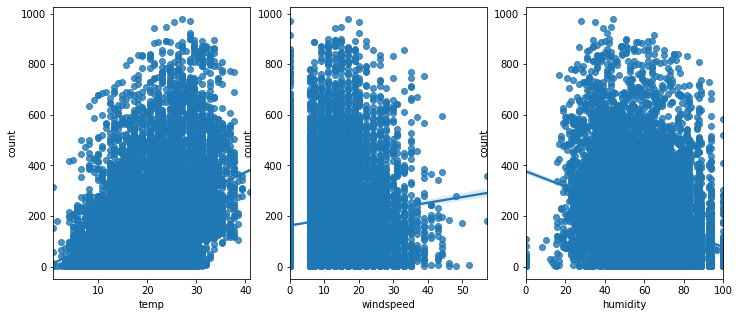

In [41]:
import seaborn as sn

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="count", data=train_df,ax=ax1)
sn.regplot(x="windspeed", y="count", data=train_df,ax=ax2)
sn.regplot(x="humidity", y="count", data=train_df,ax=ax3)
plt.show()

In [42]:
category_variable_list

['season',
 'weather',
 'workingday',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'year',
 'month',
 'day',
 'hour',
 'weekday',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

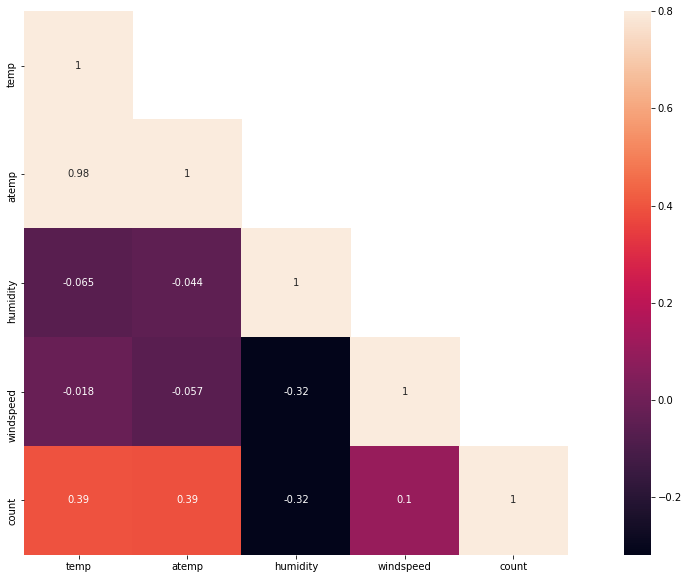

In [43]:
corrMatt = train_df[["temp","atemp","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

In [44]:
category_variable_list[:5]

['season', 'weather', 'workingday', 'season_1', 'season_2']

In [45]:
continuous_variable_list = ["temp","humidity","windspeed","atemp"]

In [46]:
season_list = ['season_1', 'season_2', 'season_3', 'season_4']
weather_list = ['weather_1', 'weather_2', 'weather_3', 'weather_4']
weekday_list = ['weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6']

In [47]:
category_varialbe_list = ["season","holiday","workingday","weather","weekday","month","year","hour"]

In [48]:
all_variable_list = continuous_variable_list + category_varialbe_list

In [49]:
all_variable_list.append(season_list)
all_variable_list.append(weather_list)
all_variable_list.append(weekday_list)

In [50]:
all_variable_list

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'year',
 'hour',
 ['season_1', 'season_2', 'season_3', 'season_4'],
 ['weather_1', 'weather_2', 'weather_3', 'weather_4'],
 ['weekday_0',
  'weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6']]

In [51]:
number_of_variables = len(all_variable_list)
number_of_variables

15

In [52]:
varaible_combinations = []
import itertools
for L in range(8, number_of_variables+1):
    for subset in itertools.combinations(all_variable_list, L):
        temp = []
        for variable in subset:
            if isinstance(variable, list):
                for value in variable:
                    temp.append(value)
            else:
                temp.append(variable)
        varaible_combinations.append(temp)

In [53]:
len(varaible_combinations)

16384